## Binary classification with DNN / Phân loại nhị phân bằng DNN

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, auc, roc_curve, classification_report

### Binary classification

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


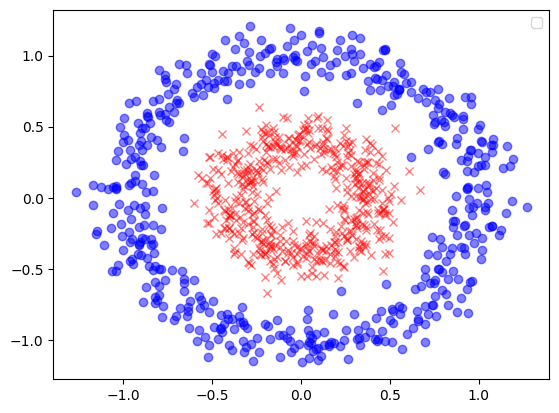

In [42]:
X, y =  make_circles(n_samples=1000, factor=0.4, noise=0.1)
plt.plot(X[y==0, 0], X[y ==0, 1], 'ob', alpha = 0.5)
plt.plot(X[y==1, 0], X[y ==1, 1], 'xr', alpha = 0.5)
plt.legend();

In [43]:
X.shape

(1000, 2)

### Train test split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Early Stopping

In [45]:
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)

### Create model

In [46]:
model = Sequential()
model.add(Dense(4, input_shape = (2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 4)                 12        
                                                                 
 dense_18 (Dense)            (None, 2)                 10        
                                                                 
 dense_19 (Dense)            (None, 1)                 3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=early_stop)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6853 - accuracy: 0.6225
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5961 - accuracy: 0.7500
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3985 - accuracy: 0.8988
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.1842 - accuracy: 0.9825
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0952 - accuracy: 0.9950
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0686 - accuracy: 0.9950
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0503 - accuracy: 0.9925
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0387 - accuracy: 0.9962
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0368 - accuracy: 0.9937
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.9937
Epoch 11/

In [48]:
# Tính loss và accuracy (metrics)
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss: " + str(loss))
print("Accuracy: " + str(accuracy))

7/7 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000
Loss: 0.002001156797632575
Accuracy: 1.0


In [49]:
y_train_pred = model.predict(X_train) > 0.5
y_test_pred = model.predict(X_test) > 0.5

print("The accuracy score on the train set is: " + str(accuracy_score(y_train, y_train_pred)))
print("The accuracy score on the test set is: " + str(accuracy_score(y_test, y_test_pred)))

7/7 [==============================] - 0s 1ms/step
The accuracy score on the train set is: 0.995
The accuracy score on the test set is: 1.0


In [50]:
confusion_matrix(y_test, y_test_pred)

array([[ 95,   0],
       [  0, 105]], dtype=int64)

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test), pos_label=1)
print('AUC: ' + str(auc(fpr, tpr)))
print(classification_report(y_test, y_test_pred))

7/7 [==============================] - 0s 1ms/step
AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       105

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [52]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c =model.predict(ab)
    cc = c.reshape(aa.shape)
    
    # plt.figure(figsize=(12,8))
    plt.contour(aa, bb, cc, cmap= 'bwr', alpha = 0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha = 0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha = 0.5)
    plt.legend(['0', '1'])

319/319 [==============================] - 0s 1ms/step


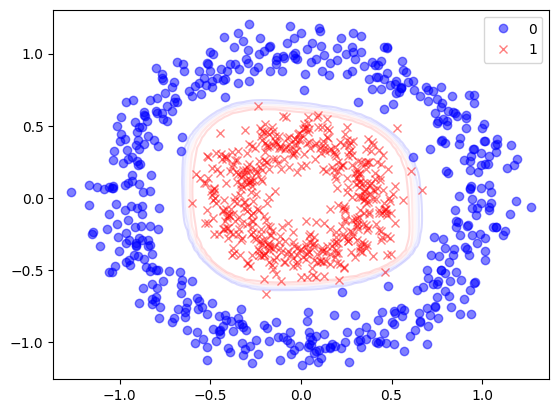

In [53]:
plot_decision_boundary(model, X, y)